In [1]:
# Imports
from pycoingecko import CoinGeckoAPI
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
# initilize client
client = CoinGeckoAPI()
client.ping()

{'gecko_says': '(V3) To the Moon!'}

In [2]:
def unix_time(year, month, day, hour, second):
    date_time = datetime.datetime(year, month, day, hour, second)
    return time.mktime(date_time.timetuple())


def input_start_date():
#     start_year = input("What is the year of the starting date you wish to analyze?")
#     start_month =  input("What is the month of the starting date you wish to analyze?")
#     start_day =input("What is the day of the starting date you wish to analyze?")
    
#     start = unix_time(int(start_year),int(start_month),int(start_day),0,0)
#     # start = int(start)
#     print(start)
#     return start
    return unix_time(2018,2,16,0,0)
    
def input_end_date():
#     end_year = input("What is the year of the end date you wish to analyze?")
#     end_month = input("What is the day of the end date you wish to analyze?")
#     end_day = input("What is the year of the end date you wish to analyze?")

#     end =  unix_time(int(end_year),int(end_month),int(end_day),0,0)
#     # end = int(end)
#     print(end)
#     return end
    return unix_time(2023,2,16,0,0)
    
    

In [8]:
def main():
    # Helper Functions
    def unix_time(year, month, day, hour, second):
        date_time = datetime.datetime(year, month, day, hour, second)
        return time.mktime(date_time.timetuple())

    def human_time(unix_time):
        return datetime.datetime.fromtimestamp(unix_time)
    

    # Getting input for specific coins/ dates
    # coin1 = input("What is the first coin you would like to compare")
    # coin2 = input("What is the second coin you would like to compare")
  
    coin1 = 'bitcoin'
    coin2 = 'dogecoin'
    coin1 = coin1.lower()
    coin2 = coin2.lower()
    
    
    start = input_start_date()
    print(start)
    end = input_end_date()
    print(start)
    
    # Reading in specified dates from API
    user_coin1 = client.get_coin_market_chart_range_by_id(
    id = coin1,
    vs_currency = 'usd',
    from_timestamp=start,
    to_timestamp=end)
    
    user_coin2 = client.get_coin_market_chart_range_by_id(
    id = coin2,
    vs_currency = 'usd',
    from_timestamp=start,
    to_timestamp=end)
    
    # Making dataframes from API
    coin1_df = pd.DataFrame.from_dict(user_coin1)
    coin2_df= pd.DataFrame.from_dict(user_coin2)
    
    # Cleaning Data
    coin1_df['date'] = coin1_df['prices'][0][0]
    coin1_df[['time', 'price']] = coin1_df['prices'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin1_df[['time2', 'market_cap']] = coin1_df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin1_df[['time3', 'total_volume']] = coin1_df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]]))
    
    coin1_df.drop('prices', axis=1, inplace=True)
    coin1_df.drop('market_caps', axis=1, inplace=True)
    coin1_df.drop('total_volumes', axis=1, inplace=True)
    coin1_df.drop('date', axis=1, inplace=True)
    coin1_df.drop('time2', axis=1, inplace=True)
    coin1_df.drop('time3', axis=1, inplace=True)
    
    
    coin2_df['date'] = coin2_df['prices'][0][0]
    coin2_df[['time', 'price']] = coin2_df['prices'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin2_df[['time2', 'market_cap']] = coin2_df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin2_df[['time3', 'total_volume']] = coin2_df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]]))
    
    coin2_df.drop('prices', axis=1, inplace=True)
    coin2_df.drop('market_caps', axis=1, inplace=True)
    coin2_df.drop('total_volumes', axis=1, inplace=True)
    coin2_df.drop('date', axis=1, inplace=True)
    coin2_df.drop('time2', axis=1, inplace=True)
    coin2_df.drop('time3', axis=1, inplace=True)
    
    coin1_df['time'] = pd.to_datetime(coin1_df['time'], unit='ms')
    coin2_df['time'] = pd.to_datetime(coin2_df['time'], unit='ms')
    
    # print(coin1_df)
    # print(coin2_df)
    calc_exchange_ratio(coin1_df,coin2_df)
    graph_trading_volumes(coin1_df,coin2_df,coin1,coin2)
    graph_market_cap(coin1_df,coin2_df,coin1,coin2)

In [4]:
def calc_exchange_ratio(coin1,coin2):
    exchange_df = pd.merge(coin1,coin2, on='time',suffixes=('_1','_2'))                           
    exchange_df['exchange_rate'] = exchange_df['price_1']/exchange_df['price_2']
    print(exchange_df.head(5)) 
    exchange_df.plot(x='time', y='exchange_rate')
    plt.show()
    
    
    
    


In [5]:
def graph_trading_volumes(coin1,coin2,name1,name2):
    merged_df =  pd.merge(coin1,coin2, on='time',suffixes=('_1','_2'))    
    plt.plot(merged_df['time'], merged_df['total_volume_1'], label= name1)
    plt.plot(merged_df['time'], merged_df['total_volume_2'], label= name2)
    plt.xlabel('Time')
    plt.ylabel('Total Trade Volume')
    plt.title('Trade Volume Over Time')
    plt.legend()
    plt.show()
    

In [10]:
def graph_market_cap(coin1,coin2,name1,name2):
    merged_df =  pd.merge(coin1,coin2, on='time',suffixes=('_1','_2'))    
    plt.plot(merged_df['time'], merged_df['market_cap_1'], label= name1)
    plt.plot(merged_df['time'], merged_df['market_cap_2'], label= name2)
    plt.xlabel('Time')
    plt.ylabel('Market Cap')
    plt.title('Market Cap Over Time')
    plt.yscale('log')  # Set y-axis to log scale
    plt.legend()
    plt.show()

1518760800.0
1518760800.0
        time       price_1  market_cap_1  total_volume_1   price_2  \
0 2018-02-17  10155.277056  1.713092e+11    3.141039e+09  0.007022   
1 2018-02-18  11006.647686  1.856923e+11    3.699819e+09  0.007061   
2 2018-02-19  10523.429306  1.775613e+11    4.740379e+09  0.006482   
3 2018-02-20  11103.090036  1.873642e+11    3.486172e+09  0.006718   
4 2018-02-21  11502.377050  1.941219e+11    4.225354e+09  0.007092   

   market_cap_2  total_volume_2  exchange_rate  
0  7.951180e+08    2.117572e+07   1.446109e+06  
1  7.996259e+08    1.377853e+07   1.558700e+06  
2  7.341491e+08    1.115831e+07   1.623380e+06  
3  7.608947e+08    8.668378e+06   1.652798e+06  
4  8.034126e+08    6.433807e+07   1.621820e+06  


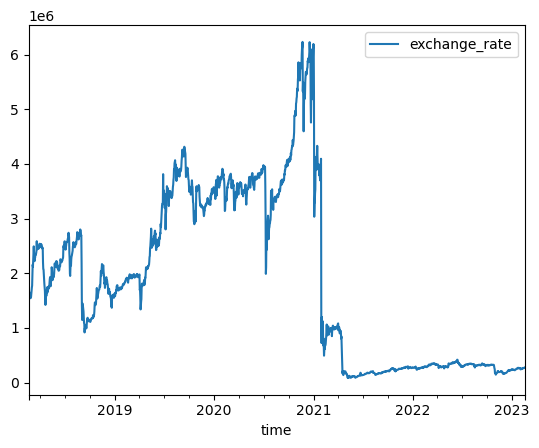

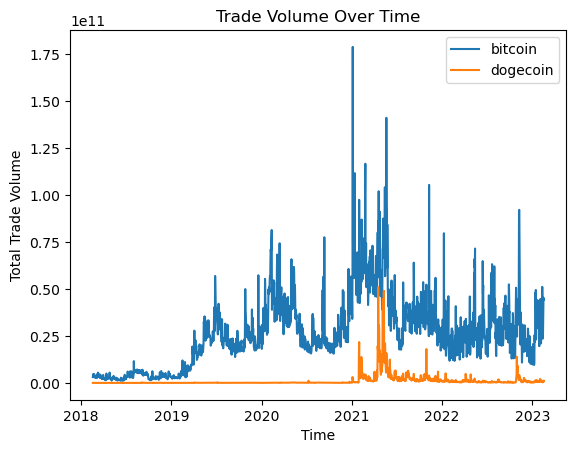

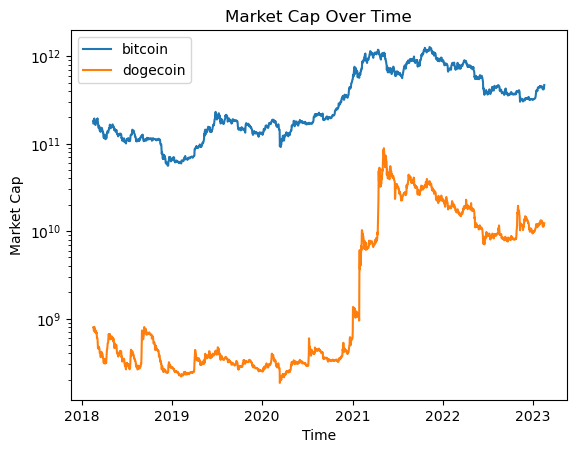

In [11]:
main()